<p style="color:#87CEEB; font-style:italic; font-size:35px; text-decoration:underline;">PROJET DEEP LEARNING : RECONNAISSANCE FACIALE AVEC MLP
</p>

<div style="float: center;">
    <center>
        <img src="https://blog.digitalcook.fr/wp-content/uploads/2021/06/The-facial-recognition.jpg" alt="Logo" width="700" height="400"/>
    </center>
</div>


<p style="color:#87CEEB; font-style:italic; font-size:30px; text-decoration:underline;">Les Auteurs :</p>
<p style="font-style:italic; font-size:20px;">- Mouhamadou Mansour BA</p>
<p style="font-style:italic; font-size:20px;">- Mame Peuya DIA</p>


<p style="color:#87CEEB; font-style:italic; font-size:30px; text-decoration:underline;">PLAN :</p>
<p style="color:#87CEEB; font-style:italic; font-size:17px; text-decoration:underline;">I. INTRODUCTION</p>
<ul>
    <p style="font-style:italic;">Objectifs</p>
    <p style="font-style:italic;">Applications de la reconnaissance faciale</p>
</ul>

<p style="color:#87CEEB; font-style:italic; font-size:17px; text-decoration:underline;">II. CHARGEMENT ET AFFICHAGE DES DONNEES</p>
<ul>
    <p style="font-style:italic;">Chargement des images (préorganisées par classe)</p>
    <p style="font-style:italic;">Affichage de quelques images de chaque classe</p>
</ul>

<p style="color:#87CEEB; font-style:italic; font-size:17px; text-decoration:underline;">III. PRETRAITEMENT DES DONNEES</p>
<ul>
    <p style="font-style:italic;">Redimensionnement des images</p>
    <p style="font-style:italic;">Aplatir les images</p>
    <p style="font-style:italic;">Normalisation des pixels</p>
    <p style="font-style:italic;">Encoder les étiquettes (One-Hot)</p>
</ul>

<p style="color:#87CEEB; font-style:italic; font-size:17px; text-decoration:underline;">IV. AUGMENTATION DES DONNEES</p>
<ul>
    <p style="font-style:italic;">Utilisation de torchvision.transforms pour effectuer : rotation, zoom, flip horizontal</p>
    <p style="font-style:italic;">Visualisation des images transformées</p>
</ul>

<p style="color:#87CEEB; font-style:italic; font-size:17px; text-decoration:underline;">V. CONSTRUCTION DU MODELE MLP</p>
<ul>
    <p style="font-style:italic;">Construction d'un MLP avec au moins deux couches denses cachées</p>
    <p style="font-style:italic;">Utilisation des fonctions d’activation ReLU</p>
    <p style="font-style:italic;">Ajout du Dropout pour éviter l’overfitting</p>
    <p style="font-style:italic;">Utilisation de Softmax en sortie</p>
</ul>

<p style="color:#87CEEB; font-style:italic; font-size:17px; text-decoration:underline;">VI. ENTRAINEMENT DU MODELE</p>
<ul>
    <p style="font-style:italic;">Utilisation de NLLLoss, adam, accuracy</p>
    <p style="font-style:italic;">Visualisation des courbes de perte et d’accuracy (entraînement/validation)</p>
</ul>

<p style="color:#87CEEB; font-style:italic; font-size:17px; text-decoration:underline;">VII. EVALUATION</p>
<ul>
    <p style="font-style:italic;">Prédiction sur les données de test</p>
    <p style="font-style:italic;">Affichage de la matrice de confusion</p>
    <p style="font-style:italic;">Analyse des erreurs</p>
</ul>

<p style="color:#87CEEB; font-style:italic; font-size:17px; text-decoration:underline;">VIII. OPTIMISATION DES HYPERPARAMETRES</p>

<p style="color:#87CEEB; font-style:italic; font-size:17px; text-decoration:underline;">IX. CONCLUSION</p>
<br><br>

Ce notebook utilise le dataset ORL (AT&T Faces) pour effectuer une tâche de reconnaissance faciale en utilisant un Perceptron Multicouche (MLP) uniquement, sans CNN.

<p style="color:#87CEEB; font-style:italic; font-size:30px; text-decoration:underline;">I. INTRODUCTION</p>

**La reconnaissance faciale** est une technologie de l’intelligence artificielle qui permet d’identifier ou de vérifier l’identité d’une personne à partir d’une image ou d’une vidéo de son visage. Elle utilise des caractéristiques propres au visage, comme la distance entre les yeux, la forme du nez ou encore la structure du visage. Ces informations sont ensuite converties en données numériques et comparées à une base de visages connus.

Elle est aujourd’hui utilisée dans de nombreux domaines, allant de la sécurité à l’expérience utilisateur, en passant par la santé et le marketing. Elle offre une méthode rapide, souvent non intrusive, et automatisée d'identification.

<p style="font-style:italic; font-size:25px; text-decoration:underline;">- Objectif du projet</p>

Le but de ce projet est de concevoir un système de reconnaissance faciale basé sur un réseau de neurones de type `MLP (Multilayer Perceptron)`. En utilisant `PyTorch`, nous allons entraîner ce modèle sur un jeu de données d’images faciales afin qu’il puisse reconnaître automatiquement les personnes présentes sur les images. Cela inclut plusieurs étapes essentielles : le prétraitement des images, l’augmentation de données, la construction du modèle, l’entraînement, l’évaluation des performances, l’analyse des erreurs et l’optimisation du modèle.

<p style="font-style:italic; font-size:25px; text-decoration:underline;">- Applications de la reconnaissance faciale</p>

La reconnaissance faciale trouve des applications variées dans la vie réelle :

- **Sécurité et contrôle d’accès :** déverrouillage de smartphones, systèmes de badge biométrique, surveillance dans les lieux publics.

- **Banques et paiements :** authentification lors de transactions bancaires ou paiements mobiles.

- **Réseaux sociaux et photographie :** détection et marquage automatique de visages sur les photos.

- **Santé :** suivi des expressions faciales chez les patients pour détecter certaines maladies.

- **Marketing :** analyse du comportement des clients en magasin (expressions, durée de regard, etc.).

<p style="color:#87CEEB; font-style:italic; font-size:30px; text-decoration:underline;">II. CHARGEMENT ET AFFICHAGE DES DONNEES</p>

In [2]:
# Importation des bibliothèques nécessaires
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import optuna
import os

In [3]:
# Choix du device (CPU ou GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Chargement et visualisation du Dataset

Le dataset est organisé par personne (s1, s2, ..., s40). Chaque personne a 10 images.

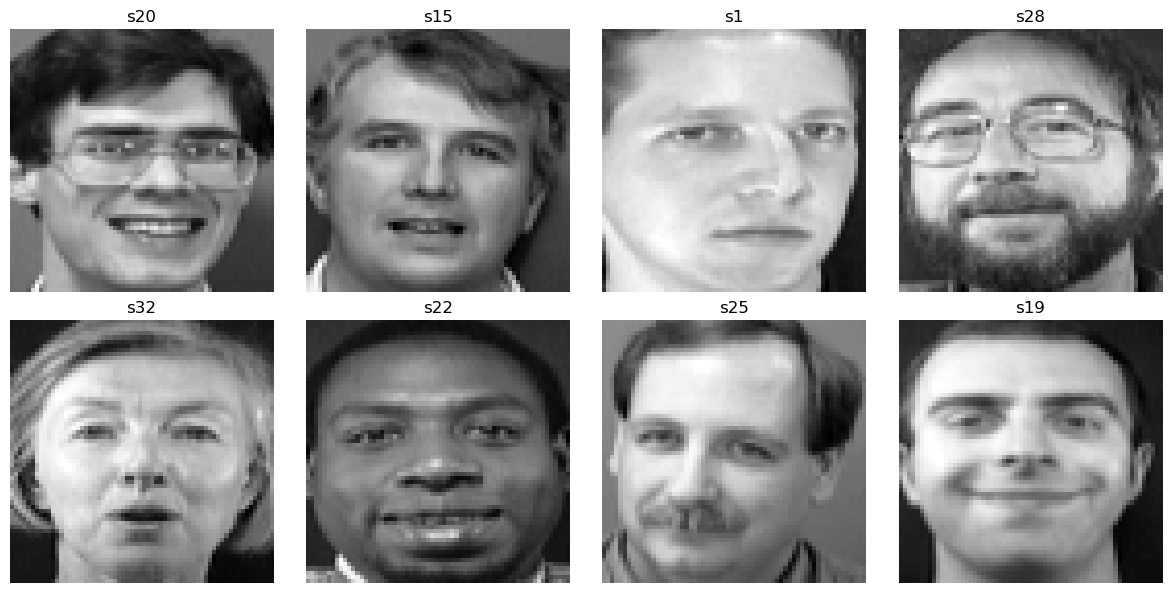

In [4]:
# Transformation basique (gris, redimensionné, tensorisé)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Chargement du dataset organisé par classe
dataset = datasets.ImageFolder("dataset", transform=transform)
class_names = dataset.classes

# Affichage de quelques images de chaque classe
def show_sample_images(dataset, num_images=8):
    loader = torch.utils.data.DataLoader(dataset, batch_size=num_images, shuffle=True)
    data_iter = iter(loader)
    images, labels = next(data_iter)

    # Dénormalisation
    images = images / 2 + 0.5  

    # Affichage en grille avec titres par image
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, num_images//2, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"{class_names[labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Affichage de quelques images de chaque classe
show_sample_images(dataset)

<p style="color:#87CEEB; font-style:italic; font-size:30px; text-decoration:underline;">III. PRETRAITEMENT DES DONNEES</p>

In [5]:
# Transformation : Grayscale, Resize, Tensor, Normalisation
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((64, 64)), # Redimensionne les images (64*64)
    transforms.ToTensor(),  # Normalisation des pixels 
])

# Chargement du dataset
dataset = datasets.ImageFolder("dataset", transform=transform)
class_names = dataset.classes
num_classes = len(class_names)

# Split en train / validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

<p style="color:#87CEEB; font-style:italic; font-size:30px; text-decoration:underline;">IV. AUGMENTATION DES DONNEES</p>

In [6]:
# Augmentations pour l'entraînement
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),            # gris
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),                      # flip horizontal
    transforms.RandomRotation(15),                          # rotation aléatoire
    transforms.RandomResizedCrop(64, scale=(0.9, 1.1)),     # zoom aléatoire
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Pour la validation (pas d'augmentation)
val_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Dataset avec augmentations pour l'entraînement
augmented_dataset = datasets.ImageFolder("dataset", transform=train_transform)

# Division train/val avec transformations différentes
train_size = int(0.8 * len(augmented_dataset))
val_size = len(augmented_dataset) - train_size

train_dataset, _ = random_split(augmented_dataset, [train_size, val_size])
_, val_dataset = random_split(datasets.ImageFolder("dataset", transform=val_transform), [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


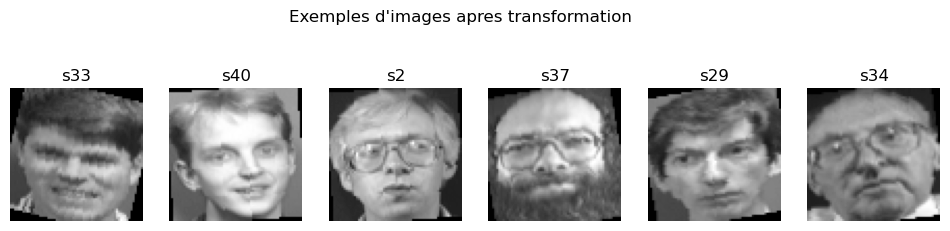

In [7]:
# Visualisation des images transformées

def show_augmented_images(loader, class_names, n=6):
    dataiter = iter(loader)
    images, labels = next(dataiter)

    plt.figure(figsize=(12, 3))
    for i in range(n):
        img = images[i].squeeze().numpy()  # enlever la dimension 1x64x64
        label = class_names[labels[i]]
        plt.subplot(1, n, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(label)
        plt.axis('off')
    plt.suptitle("Exemples d'images apres transformation")
    plt.show()

show_augmented_images(train_loader, class_names)


<p style="color:#87CEEB; font-style:italic; font-size:30px; text-decoration:underline;">V. CONSTRUCTION DU MODELE MLP</p>

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, num_classes, dropout_rate=0.3):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)         # 1ère couche dense
        self.fc2 = nn.Linear(512, 256)                # 2ème couche dense
        self.dropout = nn.Dropout(dropout_rate)       # Dropout
        self.out = nn.Linear(256, num_classes)        # Couche de sortie

    def forward(self, x):
        x = x.view(x.size(0), -1)              # Aplatir l'image (64x64 = 4096)
        x = F.relu(self.fc1(x))                # ReLU 1
        x = self.dropout(x)
        x = F.relu(self.fc2(x))                # ReLU 2
        x = self.dropout(x)
        return F.log_softmax(self.out(x), dim=1)  # Sortie probabiliste

# Paramètres
input_size = 64 * 64              # Chaque image est de taille 64x64
num_classes = len(class_names)    # Nombre de classes à prédire

# Instanciation du modèle
model = MLP(input_size, num_classes)
print(model)

MLP(
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (out): Linear(in_features=256, out_features=40, bias=True)
)


<p style="color:#87CEEB; font-style:italic; font-size:30px; text-decoration:underline;">VI. ENTRAINEMENT DU MODELE</p>

In [10]:
# Fonction de perte : NLLLoss car on utilise log_softmax en sortie
criterion = nn.NLLLoss()

# Optimiseur : Adam avec un taux d'apprentissage de base
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Nombre d’époques
epochs = 35

# Historique pour l’affichage
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Fonction d’évaluation sur un DataLoader
def evaluate(loader):
    model.eval()
    correct, total, total_loss = 0, 0, 0
    with torch.no_grad():
        for x, y in loader:
            outputs = model(x)
            loss = criterion(outputs, y)
            _, predicted = torch.max(outputs, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
            total_loss += loss.item()
    return total_loss / len(loader), correct / total

# Entraînement
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for x, y in train_loader:
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Évaluation à chaque époque
    val_loss, val_acc = evaluate(val_loader)
    train_acc = evaluate(train_loader)[1]

    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {train_losses[-1]:.4f} | "
          f"Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f} | "
          f"Val Acc: {val_acc:.4f}")


Epoch 1/35 | Train Loss: 3.6061 | Train Acc: 0.2344 | Val Loss: 2.9994 | Val Acc: 0.2250
Epoch 2/35 | Train Loss: 2.9053 | Train Acc: 0.3875 | Val Loss: 2.1330 | Val Acc: 0.4625
Epoch 3/35 | Train Loss: 2.2638 | Train Acc: 0.5781 | Val Loss: 1.4893 | Val Acc: 0.6750
Epoch 4/35 | Train Loss: 1.8765 | Train Acc: 0.6375 | Val Loss: 1.1654 | Val Acc: 0.7500
Epoch 5/35 | Train Loss: 1.5916 | Train Acc: 0.7562 | Val Loss: 0.9737 | Val Acc: 0.7625
Epoch 6/35 | Train Loss: 1.3542 | Train Acc: 0.8156 | Val Loss: 0.7212 | Val Acc: 0.8500
Epoch 7/35 | Train Loss: 1.1327 | Train Acc: 0.8500 | Val Loss: 0.6401 | Val Acc: 0.8750
Epoch 8/35 | Train Loss: 0.9894 | Train Acc: 0.8438 | Val Loss: 0.5028 | Val Acc: 0.8375
Epoch 9/35 | Train Loss: 0.8453 | Train Acc: 0.8844 | Val Loss: 0.4384 | Val Acc: 0.9000
Epoch 10/35 | Train Loss: 0.7936 | Train Acc: 0.8906 | Val Loss: 0.3732 | Val Acc: 0.9250
Epoch 11/35 | Train Loss: 0.7445 | Train Acc: 0.9062 | Val Loss: 0.3411 | Val Acc: 0.9125
Epoch 12/35 | Train

## - Visualisation des courbes de perte et d’accuracy

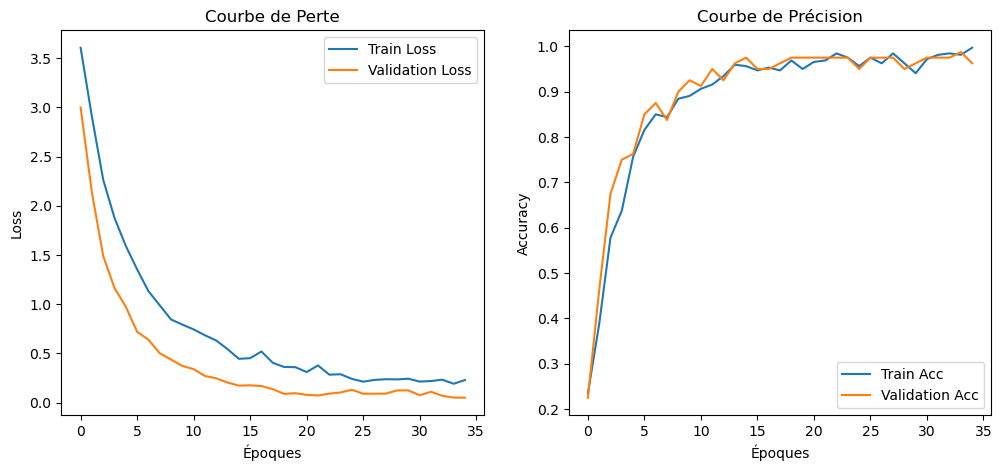

In [11]:
plt.figure(figsize=(12, 5))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Courbe de Perte")
plt.xlabel("Époques")
plt.ylabel("Loss")
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(val_accuracies, label='Validation Acc')
plt.title("Courbe de Précision")
plt.xlabel("Époques")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

# Interpretation :

- 1- Courbe de précision (Accuracy):

La précision d'entraînement (Train acc) atteint 99.69%, tandis que celle de validation (Val acc) atteint 98.75%. Cela montre que les deux courbes sont proches, ce qui indique que le modèle généralise bien.

Donc le modèle a une bonne précision, apprend efficacement et généralise bien sans surajustement.


- 1- Courbe de perte (Loss):

La perte d'entraînement (Train Loss) descend de 3.60 à 0.22, tandis que la perte de validation (Val Loss) passe de 3.0 à 0.05. Les deux courbes diminuent de manière similaire, ce qui montre qu'il n'y a ni surapprentissage ni sous-apprentissage.

L'apprentissage est stable et le modèle généralise bien, avec une bonne réduction de la perte.

<p style="color:#87CEEB; font-style:italic; font-size:30px; text-decoration:underline;">VII. EVALUATION DU MODELE</p>

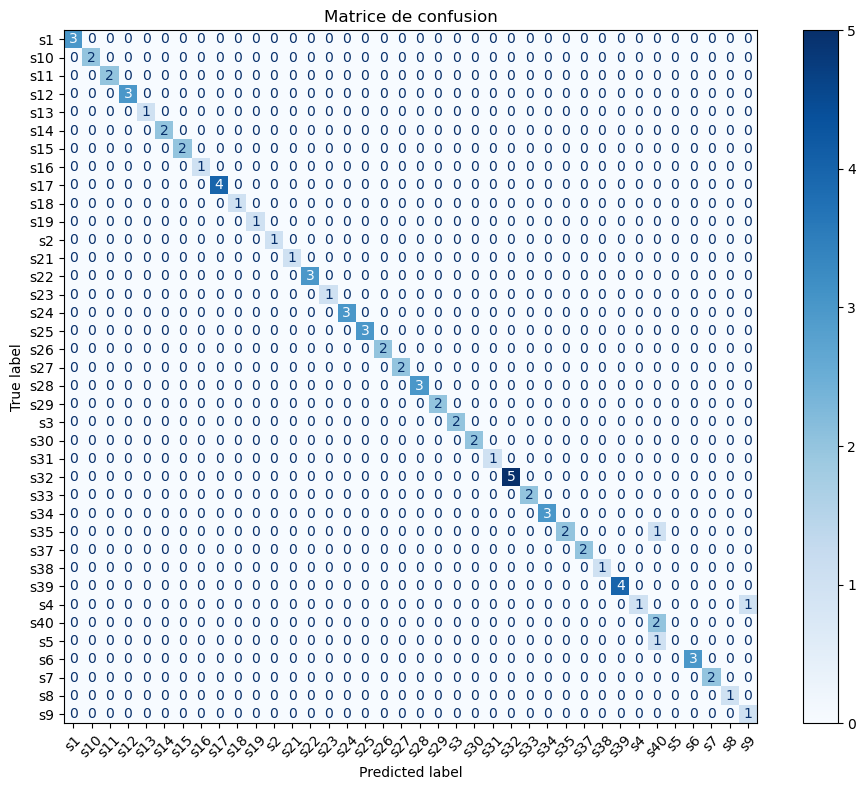

In [18]:
# Prédiction sur le jeu de validation
all_preds, all_labels = [], []
model.eval()
with torch.no_grad():
    for x, y in val_loader:
        preds = model(x).argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y.cpu().numpy())

# Récupérer les classes présentes
present_classes = np.unique(all_labels)
present_class_names = [class_names[i] for i in present_classes]

# Matrice de confusion
cm = confusion_matrix(all_labels, all_preds, labels=present_classes)
disp = ConfusionMatrixDisplay(cm, display_labels=present_class_names)

# Affichage
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Matrice de confusion")
plt.tight_layout()
plt.show()

# Analyse des erreurs 

In [ ]:
import pandas as pd

# Convertir la matrice en DataFrame pour l’analyse
cm_df = pd.DataFrame(cm, index=present_class_names, columns=present_class_names)

# Supprimer la diagonale
for i in range(len(cm)):
    cm_df.iloc[i, i] = 0

# Trier les erreurs
most_confused = cm_df.stack().sort_values(ascending=False)

# Créer un tableau (DataFrame) à partir des erreurs de confusion
tableau_erreurs = most_confused.reset_index()
tableau_erreurs.columns = ['Classe réelle', 'Classe prédite', 'Nombre d\'erreurs']

# Filtrer automatiquement les erreurs
erreurs_non_nulles = tableau_erreurs[tableau_erreurs['Nombre d\'erreurs'] > 0]

# Affichage des erreurs
print("Erreurs de confusion :\n")
print(erreurs_non_nulles)


Top erreurs de confusion (automatiquement filtrées) :

  Classe réelle Classe prédite  Nombre d'erreurs
0            s5            s40                 1
1            s4             s9                 1
2           s35            s40                 1


- Ces erreurs peuvent s’expliquer par des similarités visuelles entre les visages, comme des expressions similaires, des poses proches, ou une qualité d’image réduite. Cela souligne la sensibilité du MLP aux variations intra-classe et au manque d’invariance aux transformations comme les angles de vue.

Nombre total d’erreurs de classification : 3


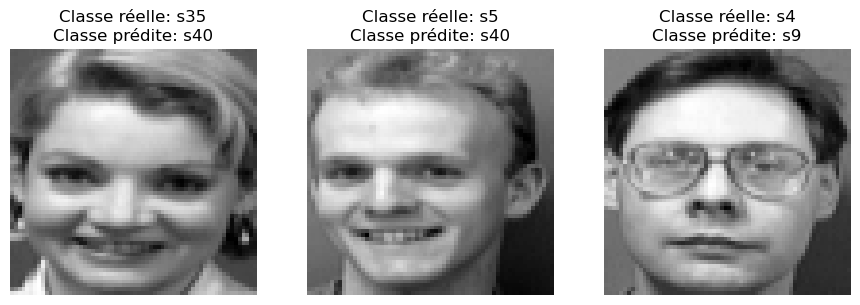

In [23]:
# Créer une liste pour stocker les erreurs
misclassified_images = []
misclassified_labels = []
misclassified_preds = []

# Parcours des données de validation
model.eval()
with torch.no_grad():
    for x, y in val_loader:
        outputs = model(x)
        preds = outputs.argmax(dim=1)

        for i in range(len(y)):
            if preds[i] != y[i]:
                misclassified_images.append(x[i])
                misclassified_labels.append(y[i])
                misclassified_preds.append(preds[i])

# Afficher les images mal classées
n_errors = len(misclassified_images)
print(f"Nombre total d’erreurs de classification : {n_errors}")

n_cols = 5
n_rows = (n_errors + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 3, n_rows * 3))

for idx in range(n_errors):
    img = misclassified_images[idx].squeeze().cpu().numpy()
    true_label = class_names[misclassified_labels[idx]]
    predicted_label = class_names[misclassified_preds[idx]]

    plt.subplot(n_rows, n_cols, idx + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Classe réelle: {true_label}\nClasse prédite: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

***<p style="color:#87CEEB; font-style:italic; font-size:30px; text-decoration:underline;">VIII. OPTIMISATION DES HYPERPARAMETRES AVEC OPTUNA</p>***

In [24]:
# Fonction d’évaluation pour Optuna
def objective(trial):
    # Hyperparamètres à optimiser
    hidden1 = trial.suggest_int("hidden1", 128, 1024)
    hidden2 = trial.suggest_int("hidden2", 64, 512)
    dropout = trial.suggest_float("dropout", 0.2, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)

    # Modèle temporaire pour cette combinaison
    class TunedMLP(nn.Module):
        def __init__(self):
            super().__init__()
            self.fc1 = nn.Linear(64 * 64, hidden1)
            self.fc2 = nn.Linear(hidden1, hidden2)
            self.dropout = nn.Dropout(dropout)
            self.out = nn.Linear(hidden2, num_classes)

        def forward(self, x):
            x = x.view(x.size(0), -1)
            x = F.relu(self.fc1(x))
            x = self.dropout(x)
            x = F.relu(self.fc2(x))
            x = self.dropout(x)
            return F.log_softmax(self.out(x), dim=1)

    # Instancier et entraîner le modèle
    model = TunedMLP()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.NLLLoss()

    for epoch in range(5):  # entraînement rapide pour chaque essai
        model.train()
        for x, y in train_loader:
            optimizer.zero_grad()
            output = model(x)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()

    # Évaluer la performance (val_loss)
    val_loss, val_acc = evaluate(val_loader)
    return val_loss  # minimiser la loss

# Lancer l’optimisation
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

# Afficher les meilleurs hyperparamètres trouvés
print("\nMeilleurs hyperparamètres trouvés :", study.best_params)


[I 2025-04-21 16:17:15,667] A new study created in memory with name: no-name-1a89f70a-d34d-46f1-ab96-af2f5fa2e914
[I 2025-04-21 16:17:21,922] Trial 0 finished with value: 0.050420535107453666 and parameters: {'hidden1': 783, 'hidden2': 300, 'dropout': 0.39129664370053613, 'lr': 0.0032120166760414974}. Best is trial 0 with value: 0.050420535107453666.
[I 2025-04-21 16:17:26,964] Trial 1 finished with value: 0.050420535107453666 and parameters: {'hidden1': 457, 'hidden2': 475, 'dropout': 0.3706263985089427, 'lr': 0.0005633721932866197}. Best is trial 0 with value: 0.050420535107453666.
[I 2025-04-21 16:17:30,947] Trial 2 finished with value: 0.050420535107453666 and parameters: {'hidden1': 172, 'hidden2': 151, 'dropout': 0.4056917103363906, 'lr': 0.00015856124453135826}. Best is trial 0 with value: 0.050420535107453666.
[I 2025-04-21 16:17:35,447] Trial 3 finished with value: 0.050420535107453666 and parameters: {'hidden1': 151, 'hidden2': 182, 'dropout': 0.24017981247708156, 'lr': 0.001


Meilleurs hyperparamètres trouvés : {'hidden1': 783, 'hidden2': 300, 'dropout': 0.39129664370053613, 'lr': 0.0032120166760414974}


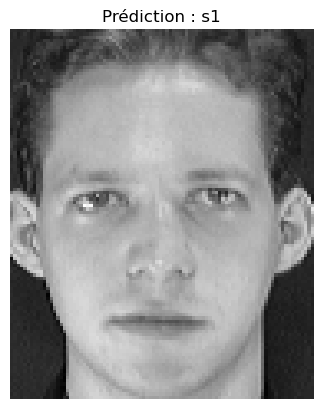

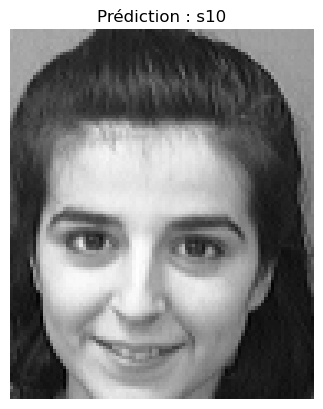

's10'

In [ ]:
from PIL import Image

def predict_and_show(image_path, model, class_names):
    """
    Prédit et affiche une image externe avec sa classe prédite.

    Paramètres :
    - image_path : chemin vers l'image à prédire
    - model : modèle PyTorch entraîné
    - class_names : liste des noms de classes
    """
    # Prétraitement comme pour l'entraînement
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    # Charger l'image
    image = Image.open(image_path).convert("L")
    image_tensor = transform(image).unsqueeze(0)  # [1, 1, 64, 64]

    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        prediction = output.argmax(dim=1).item()
        predicted_label = class_names[prediction]

    # Affichage
    plt.imshow(image, cmap='gray')
    plt.title(f"Prédiction : {predicted_label}")
    plt.axis('off')
    plt.show()

    return predicted_label

predict_and_show("test_image_s1.jpg", model, class_names)
predict_and_show("test_image_s10.jpg", model, class_names)

<p style="color:#87CEEB; font-style:italic; font-size:30px; text-decoration:underline;">IX. CONCLUSION</p>

Dans ce projet, nous avons développé un système de reconnaissance faciale basé sur un réseau de neurones multicouche (MLP) à l’aide de PyTorch. L’objectif principal était de classifier des visages humains selon leur identité à partir d’un ensemble d’images étiquetées.

Nous avons commencé par la préparation du dataset, incluant la conversion en niveaux de gris, le redimensionnement, la normalisation et l'augmentation des données pour améliorer la robustesse du modèle. Le dataset a ensuite été divisé en ensembles d’entraînement et de validation.

Nous avons ensuite construit une architecture MLP simple mais efficace, composée de deux couches cachées entièrement connectées avec la fonction d’activation ReLU et des techniques de régularisation telles que le Dropout pour prévenir le surapprentissage.

L'entraînement du modèle a été réalisé sur plusieurs époques, en suivant l’évolution des courbes de perte et de précision. Les résultats ont montré une bonne capacité de généralisation du modèle sur l’ensemble de validation.

Afin d’analyser les performances du modèle, nous avons :

- Généré une matrice de confusion pour visualiser les erreurs de classification,

- Identifié les classes les plus fréquemment confondues,

- Affiché les images mal classées pour mieux comprendre les limites du modèle.

Une étape importante du projet a également été l’optimisation des hyperparamètres via la bibliothèque Optuna. Cette optimisation a permis de sélectionner automatiquement les meilleures valeurs pour le nombre de neurones, le taux de dropout et le taux d’apprentissage.

Enfin, nous avons intégré une fonction permettant de prédire des images externes, ce qui rend le modèle utilisable dans un cadre réel.

# PERSPECTIVES
Bien que les résultats soient satisfaisants, plusieurs pistes d'amélioration sont envisageables :

- Utiliser des architectures plus complexes comme `les réseaux de neurones convolutifs (CNN)`,

- Etendre le dataset à plus de classes et plus de variabilité,

- Intégrer une interface utilisateur pour une utilisation en temps réel.